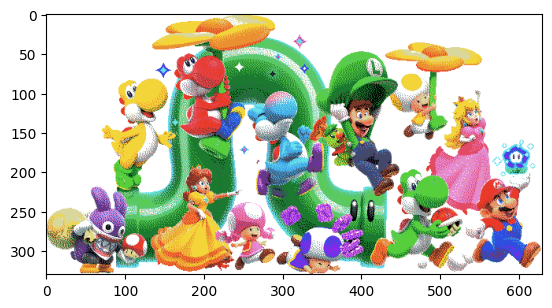

In [92]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = Image.open("20col.png")
plt.imshow(img)
a = np.array(img)
h, w, c = a.shape

## Compress via K-Means clustering
Each pixel is a vector in `[0, 255]x[0, 255]x[0, 255]`. Cluster these vectors using k-means and assign to each point the centroid as compressed color.

Unique colors found in img: 20


c:\Users\giaco\miniconda3\envs\main\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


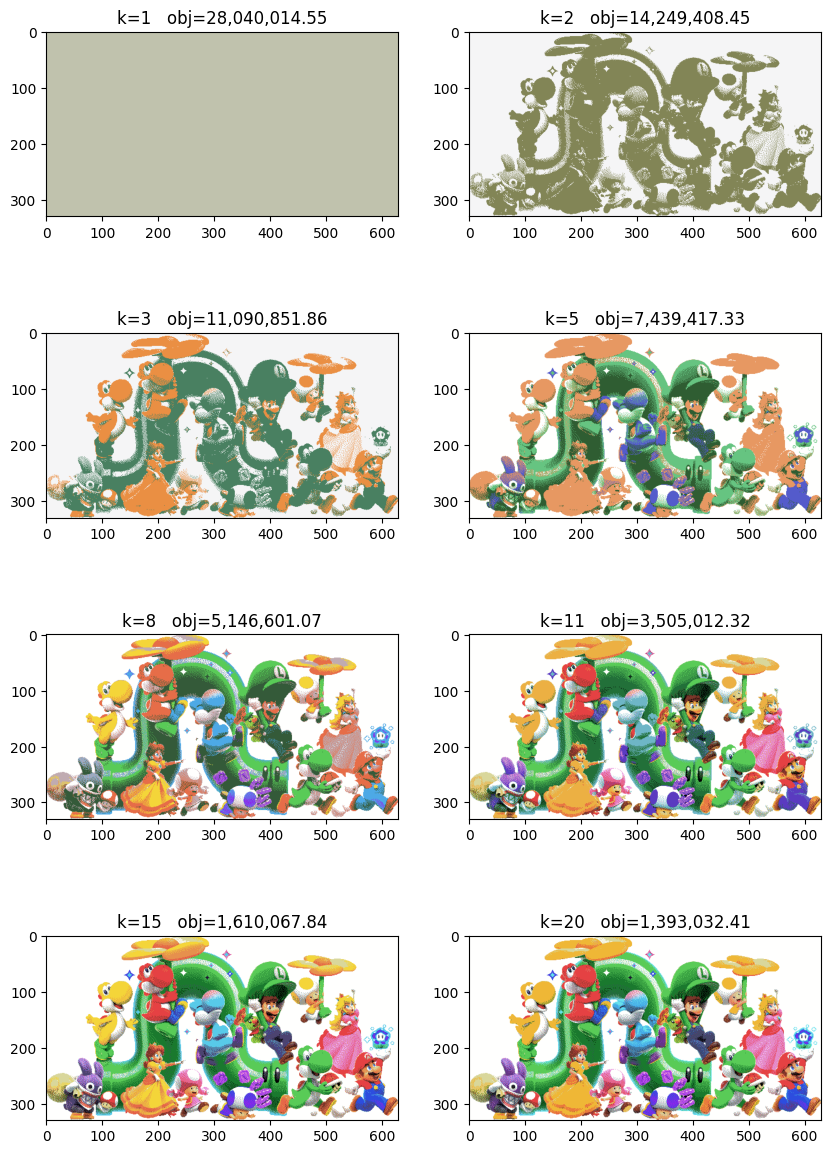

In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Flatten the image
X = a.reshape(h*w, c)
n_colors = np.unique(X, axis=0).shape[0]
print(f'Unique colors found in img: {n_colors}')

# Center and scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X 

plt.figure(figsize=(10, 15))
ks = np.unique(np.logspace(0, np.log10(n_colors), num=10, dtype = int))
ks = [1, 2, 3, 5, 8, 11, 15, 20]
for i in range(len(ks)):
    k = ks[i]
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, init='random')  # Adjust 'n_clusters' as needed
    kmeans.fit(X_scaled)

    # Replace each pixel by its centroid
    X_compressed = kmeans.cluster_centers_[kmeans.labels_]
    obj = np.sum(np.sum((X_scaled.reshape(-1, 3) - X_compressed.reshape(-1, 3))**2, axis=1)**0.5)
    
    # Convert back to RGB
    img_compressed = scaler.inverse_transform(X_compressed).reshape(h, w, c).astype(np.uint8)
    img_compressed = X_compressed.reshape(h, w, c).astype(np.uint8)
    plt.subplot(len(ks)//2, 2, i+1)
    plt.title(f'k={k}   obj={obj:,.2f}')
    plt.imshow(img_compressed)

plt.show()

In [17]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=8, n_init=10):
        self.n_clusters = n_clusters
        self.n_init = n_init
    
    def fit(self, X):
        """
        Fit the model to the data X.
        X is an array of shape (n_samples, n_features).

        """

        # Randomly init centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.n_init):
            self.labels = self.predict(X)
            self.centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def predict(self, X):
        """
        Return the closest centroid for each sample in X.
        X is an array of shape (n_samples, n_features).

        """

        return np.argmin(np.linalg.norm(X[:, None] - self.centroids, axis=2), axis=1)
                      
model = KMeans(n_clusters=3)
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
model.fit(X)
model.centroids

array([[5., 5.],
       [2., 2.],
       [4., 4.]])

In [8]:
import numpy as np
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [1,1]])
n_clusters = 3
centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
print(centroids)
print(labels)

np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

[[2 2]
 [4 4]
 [1 1]]
[2 0 0 1 1 2]


array([[2.5, 2.5],
       [4.5, 4.5],
       [1. , 1. ]])

In [52]:
np.min(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1).sum()

2.8284271247461903

In [17]:
np.unique(X, axis = 0, return_counts=True)[1]

colors, counts = np.unique(X, axis=0, return_counts=True)
print(colors, counts)
# Sort the colors by frequency (descending order)
sorted_indices = np.argsort(counts)[::-1]
print(sorted_indices)
print(sorted_indices[:4])
# # Select the top n_clusters most frequent colors
# most_frequent_colors = colors[sorted_indices[:self.n_clusters]]

[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]] [2 1 1 1 1]
[0 4 3 2 1]
[0 4 3 2]


In [26]:
np.random.normal(0, 1, 19).astype(int)

array([-1,  0, -2,  0,  1, -1,  0,  0,  0,  1, -1,  0,  0,  0,  1,  0, -1,
        0,  0])